In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc

from p_power import *
from max_sim_diag import *

%load_ext autoreload
%autoreload 2

Using device: cpu


In [30]:
A = tc.complex(tc.Tensor([[2, 1], [1, 2]]), tc.zeros(2, 2))
U = tc.complex(tc.Tensor([[1, 1], [1, -1]]), tc.zeros(2, 2)) / np.sqrt(2)
y = tc.complex(
    *[tc.normal(mean=tc.zeros((100,100)), std=1) for _ in range(2)]
).to(device)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.28it/s]
/tmp/ipykernel_2629/3583076416.py:5: RuntimeWarning: divide by zero encountered in divide
  qs = 1 - 1 / (1 - ps)


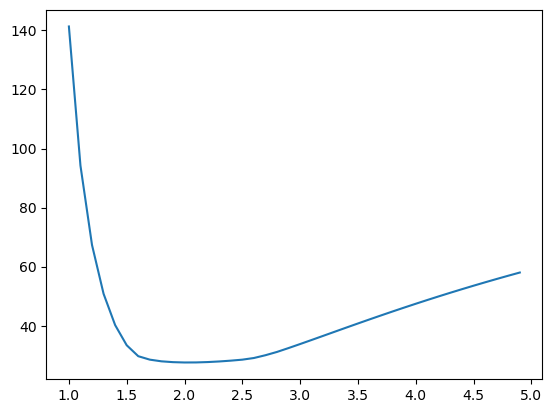

In [4]:
ps = np.arange(1, 5, 0.1)
norms = [p_power(y, p, s_max=100)[0] for p in tqdm(ps)]
norms = [n if n==0 else n.item() for n in norms]
plt.plot(ps, norms)
qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:18<00:00,  2.15it/s]


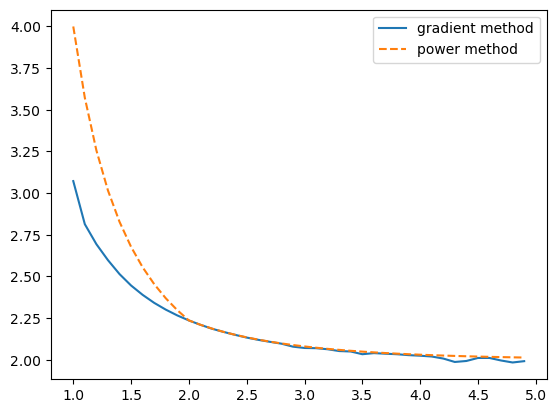

In [52]:
ps = np.arange(1, 5, 0.1)
norms = [max_sim_diag(A, U, p) for p in tqdm(ps)]
b, a = zip(*norms)
b = [x.item() for x in b]
a = [x.item() for x in a]
plt.plot(ps, b, label='gradient method')
plt.plot(ps, a, label='power method', linestyle='--')
plt.legend()
# qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()

In [18]:
max_sim_diag(A, U, 1.1)

torch.Size([1, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([50, 1, 1])
torch.Size([

(tensor(4.6945), tensor([[[6.7080]]]))

In [47]:
tc.linalg.matrix_norm(y, ord=2)

tensor(27.4900)

In [48]:
dual(y, p=2, dim=1)**2

tensor([[-2.3638e-02+6.3190e-03j,  3.1668e-03-8.1294e-04j,
         -1.4221e-03-3.3493e-03j,  ...,
         -4.3735e-05-4.6592e-05j, -5.0642e-03+3.7138e-03j,
         -1.6586e-02-6.0806e-03j],
        [-2.0381e-04+1.6986e-04j, -1.4659e-02+2.0038e-02j,
          1.9636e-04+4.4459e-03j,  ...,
         -1.3794e-03+3.7999e-03j, -2.9546e-03+1.3542e-03j,
         -1.3987e-02+2.8516e-02j],
        [-1.8128e-03-1.1070e-02j, -8.6571e-03-3.1685e-03j,
          3.1071e-03+1.9178e-03j,  ...,
         -1.4699e-03+5.0073e-03j,  1.3595e-02-3.1532e-03j,
         -3.3260e-03+5.0183e-03j],
        ...,
        [ 1.0012e-03+1.2723e-03j, -1.3375e-03-1.9326e-03j,
         -1.9784e-03+1.4977e-03j,  ...,
         -7.0354e-03+3.4385e-03j,  2.0415e-03-4.3114e-03j,
          8.4002e-03-3.2736e-03j],
        [ 7.9606e-03-6.4678e-03j,  8.1465e-04+1.8143e-03j,
         -9.8902e-04-3.5106e-04j,  ...,
          1.5664e-02-1.0137e-01j,  7.0587e-03-2.1119e-03j,
          1.0086e-03+7.9496e-04j],
        [ 1.9246e-04+6

In [49]:
range(2)

range(0, 2)

In [23]:
dim=1
val, ind = y.abs().max(dim=dim, keepdim=True)
range_shape = [1 for _ in range(len(y.shape))]
range_shape[dim] = -1
y_dual = 0 * y
y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = val.sgn().flatten()
#y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = tc.sgn(val)

Using device: cpu


RuntimeError: Index put requires the source and destination dtypes match, got ComplexFloat for the destination and Float for the source.

In [ ]:
y_dual

tensor([[0., 0., 1.],
        [1., -0., -0.]])

In [7]:
B = tc.randint(0, 4, size=(1, 4, 2, 2))

In [9]:
B.transpose(1, 2).flatten(2, 3)

tensor([[[1, 3, 2, 3, 2, 1, 2, 2],
         [1, 3, 3, 2, 1, 0, 3, 2]]])

In [12]:
B[0,1]

tensor([[2, 3],
        [3, 2]])

In [22]:
1 / tc.Tensor([np.inf])

tensor([0.])